In [54]:
# Air_Quality_Analysis_and_Prediction_for_Indian_Cities_and_States 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import math
import joblib
%matplotlib inline

In [53]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
station_df = pd.read_csv(r"C:\Users\YATI\Downloads\stations.csv") 
station_day_df = pd.read_csv(r"C:\Users\YATI\Downloads\station_day.csv") 

In [3]:
station_df

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active
...,...,...,...,...,...
225,WB010,"Jadavpur, Kolkata - WBPCB",Kolkata,West Bengal,Active
226,WB011,"Rabindra Bharati University, Kolkata - WBPCB",Kolkata,West Bengal,Active
227,WB012,"Rabindra Sarobar, Kolkata - WBPCB",Kolkata,West Bengal,Active
228,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active


In [4]:
station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StationId    230 non-null    object
 1   StationName  230 non-null    object
 2   City         230 non-null    object
 3   State        230 non-null    object
 4   Status       133 non-null    object
dtypes: object(5)
memory usage: 9.1+ KB


In [5]:
station_df.shape

(230, 5)

In [6]:
station_day_df

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,24-11-2017,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,25-11-2017,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,26-11-2017,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,27-11-2017,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,28-11-2017,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108030,WB013,27-06-2020,8.65,16.46,NaN,NaN,NaN,NaN,0.69,4.36,30.59,1.32,7.26,NaN,50.0,Good
108031,WB013,28-06-2020,11.80,18.47,NaN,NaN,NaN,NaN,0.68,3.49,38.95,1.42,7.92,NaN,65.0,Satisfactory
108032,WB013,29-06-2020,18.60,32.26,13.65,200.87,214.20,11.40,0.78,5.12,38.17,3.52,8.64,NaN,63.0,Satisfactory
108033,WB013,30-06-2020,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,29.64,1.86,8.40,NaN,57.0,Satisfactory


In [7]:
station_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   108035 non-null  object 
 1   Date        108035 non-null  object 
 2   PM2.5       86410 non-null   float64
 3   PM10        65329 non-null   float64
 4   NO          90929 non-null   float64
 5   NO2         91488 non-null   float64
 6   NOx         92535 non-null   float64
 7   NH3         59930 non-null   float64
 8   CO          95037 non-null   float64
 9   SO2         82831 non-null   float64
 10  O3          82467 non-null   float64
 11  Benzene     76580 non-null   float64
 12  Toluene     69333 non-null   float64
 13  Xylene      22898 non-null   float64
 14  AQI         87025 non-null   float64
 15  AQI_Bucket  87025 non-null   object 
dtypes: float64(13), object(3)
memory usage: 13.2+ MB


In [8]:
station_day_df.shape

(108035, 16)

In [9]:
# we will join the datasets as it makes analysing the data easier

# we dont need the name of the station and the satus if it is active or not so dropping these columns

station_df = station_df.drop(columns=["StationName","Status"])

station_df

,StationId,City,State
0,AP001,Amaravati,Andhra Pradesh
1,AP002,Rajamahendravaram,Andhra Pradesh
2,AP003,Tirupati,Andhra Pradesh
3,AP004,Vijayawada,Andhra Pradesh
4,AP005,Visakhapatnam,Andhra Pradesh
...,...,...,...
225,WB010,Kolkata,West Bengal
226,WB011,Kolkata,West Bengal
227,WB012,Kolkata,West Bengal
228,WB013,Kolkata,West Bengal


In [10]:
station_merged_df = pd.merge(station_df, station_day_df, on="StationId")

In [11]:
# 1. general shape
station_merged_df.shape

(108035, 18)

In [12]:
# 2. some values
station_merged_df

,StationId,City,State,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,Amaravati,Andhra Pradesh,24-11-2017,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,Amaravati,Andhra Pradesh,25-11-2017,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,Amaravati,Andhra Pradesh,26-11-2017,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,Amaravati,Andhra Pradesh,27-11-2017,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,Amaravati,Andhra Pradesh,28-11-2017,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108030,WB013,Kolkata,West Bengal,27-06-2020,8.65,16.46,NaN,NaN,NaN,NaN,0.69,4.36,30.59,1.32,7.26,NaN,50.0,Good
108031,WB013,Kolkata,West Bengal,28-06-2020,11.80,18.47,NaN,NaN,NaN,NaN,0.68,3.49,38.95,1.42,7.92,NaN,65.0,Satisfactory
108032,WB013,Kolkata,West Bengal,29-06-2020,18.60,32.26,13.65,200.87,214.20,11.40,0.78,5.12,38.17,3.52,8.64,NaN,63.0,Satisfactory
108033,WB013,Kolkata,West Bengal,30-06-2020,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,29.64,1.86,8.40,NaN,57.0,Satisfactory


In [13]:
# 3. columns

station_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108035 entries, 0 to 108034
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   108035 non-null  object 
 1   City        108035 non-null  object 
 2   State       108035 non-null  object 
 3   Date        108035 non-null  object 
 4   PM2.5       86410 non-null   float64
 5   PM10        65329 non-null   float64
 6   NO          90929 non-null   float64
 7   NO2         91488 non-null   float64
 8   NOx         92535 non-null   float64
 9   NH3         59930 non-null   float64
 10  CO          95037 non-null   float64
 11  SO2         82831 non-null   float64
 12  O3          82467 non-null   float64
 13  Benzene     76580 non-null   float64
 14  Toluene     69333 non-null   float64
 15  Xylene      22898 non-null   float64
 16  AQI         87025 non-null   float64
 17  AQI_Bucket  87025 non-null   object 
dtypes: float64(13), object(5)
memory usage: 15.7

In [14]:
# 4 data distribution

station_merged_df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,86410.000000,65329.000000,90929.000000,91488.000000,92535.000000,59930.000000,95037.000000,82831.000000,82467.000000,76580.000000,69333.000000,22898.000000,87025.000000
mean,80.272571,157.968427,23.123424,35.240760,41.195055,28.732875,1.605749,12.257634,38.134836,3.358029,15.345394,2.423446,179.749290
std,76.526403,123.418672,34.491019,29.510827,45.145976,24.897797,4.369578,12.984723,39.128004,11.156234,29.348587,6.472409,131.324339
min,0.020000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,31.880000,70.150000,4.840000,15.090000,13.970000,11.900000,0.530000,5.040000,18.895000,0.160000,0.690000,0.000000,86.000000
50%,55.950000,122.090000,10.290000,27.210000,26.660000,23.590000,0.910000,8.950000,30.840000,1.210000,4.330000,0.400000,132.000000
75%,99.920000,208.670000,24.980000,46.930000,50.500000,38.137500,1.450000,14.920000,47.140000,3.610000,17.510000,2.110000,254.000000
max,1000.000000,1000.000000,470.000000,448.050000,467.630000,418.900000,175.810000,195.650000,963.000000,455.030000,454.850000,170.370000,2049.000000


In [15]:
station_merged_df.isnull().sum()

StationId         0
City              0
State             0
Date              0
PM2.5         21625
PM10          42706
NO            17106
NO2           16547
NOx           15500
NH3           48105
CO            12998
SO2           25204
O3            25568
Benzene       31455
Toluene       38702
Xylene        85137
AQI           21010
AQI_Bucket    21010
dtype: int64

In [16]:
#there are 21010 rows in the dataset where AQI, and AQI_Bucket are missing
#these rows are useless as they dont have our target value so we will remove them
# we will only selecting values where isnull is not true (meaning the value is not null)

mask = station_merged_df["AQI"].isnull() == False
station_merged_df = station_merged_df[mask]

In [17]:
station_merged_df.isnull().sum()

StationId         0
City              0
State             0
Date              0
PM2.5          3488
PM10          23961
NO             2229
NO2            1566
NOx            4555
NH3           29832
CO             2896
SO2            9533
O3             9598
Benzene       19787
Toluene       26324
Xylene        67584
AQI               0
AQI_Bucket        0
dtype: int64

In [18]:
station_merged_df.describe().loc["mean"]

PM2.5       80.387649
PM10       158.557614
NO          23.244401
NO2         35.118825
NOx         43.246664
NH3         28.654163
CO           1.615741
SO2         12.212651
O3          38.320547
Benzene      3.566688
Toluene     16.557039
Xylene       2.770696
AQI        179.749290
Name: mean, dtype: float64

In [19]:
station_merged_df = station_merged_df.replace({

"PM2.5" : {np.nan:80.387649},
"PM10" :{np.nan:158.557614},
"NO": {np.nan:23.244401},
"NO2": {np.nan:35.118825},
"NOx": {np.nan:43.246664},
"NH3": {np.nan:28.654163},
"CO":  {np.nan:1.615741},
"SO2": {np.nan:12.212651},
"O3": {np.nan:38.320547},
"Benzene":  {np.nan:3.566688},
"Toluene": {np.nan:16.557039},
"Xylene":  {np.nan:2.770696}})
station_merged_df.isnull().sum()

StationId     0
City          0
State         0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [20]:
# the same thing can be done in this way as well
# this is the imputing method

# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

# columns_to_impute = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# station_merged_df['PM2.5'] = imputer.fit_transform(station_merged_df[["PM2.5"]])
# station_merged_df['PM10'] = imputer.fit_transform(station_merged_df[["PM10"]])
# station_merged_df['NO'] = imputer.fit_transform(station_merged_df[["NO"]])
# station_merged_df['NO2'] = imputer.fit_transform(station_merged_df[["NO2"]])
# station_merged_df['NOx'] = imputer.fit_transform(station_merged_df[["NOx"]])
# station_merged_df['NH3'] = imputer.fit_transform(station_merged_df[["NH3"]])
# station_merged_df['CO'] = imputer.fit_transform(station_merged_df[["CO"]])
# station_merged_df['SO2'] = imputer.fit_transform(station_merged_df[["SO2"]])
# station_merged_df['O3'] = imputer.fit_transform(station_merged_df[["O3"]])
# station_merged_df['Benzene'] = imputer.fit_transform(station_merged_df[["Benzene"]])
# station_merged_df['Toluene'] = imputer.fit_transform(station_merged_df[["Toluene"]])
# station_merged_df['Xylene'] = imputer.fit_transform(station_merged_df[["Xylene"]])

# station_merged_df.isnull().sum()


In [21]:
station_merged_df["Date"] = pd.to_datetime(station_merged_df["Date"])
station_merged_df["year"] = station_merged_df["Date"].dt.year
station_merged_df["month"] = station_merged_df["Date"].dt.month
station_merged_df["day"] = station_merged_df["Date"].dt.day
station_merged_df.drop('Date',axis=1,inplace=True)

<b> This is what our station_merged_df looks like after preliminary data analysis </b>

In [22]:
station_merged_df.shape

(87025, 20)

In [23]:
station_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87025 entries, 1 to 108034
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StationId   87025 non-null  object 
 1   City        87025 non-null  object 
 2   State       87025 non-null  object 
 3   PM2.5       87025 non-null  float64
 4   PM10        87025 non-null  float64
 5   NO          87025 non-null  float64
 6   NO2         87025 non-null  float64
 7   NOx         87025 non-null  float64
 8   NH3         87025 non-null  float64
 9   CO          87025 non-null  float64
 10  SO2         87025 non-null  float64
 11  O3          87025 non-null  float64
 12  Benzene     87025 non-null  float64
 13  Toluene     87025 non-null  float64
 14  Xylene      87025 non-null  float64
 15  AQI         87025 non-null  float64
 16  AQI_Bucket  87025 non-null  object 
 17  year        87025 non-null  int64  
 18  month       87025 non-null  int64  
 19  day         87025 non-nu

In [24]:
station_merged_df

,StationId,City,State,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,day
1,AP001,Amaravati,Andhra Pradesh,81.40,124.50,1.440000,20.500000,12.080000,10.720000,0.12,15.24,127.09,0.20,6.50,0.060000,184.0,Moderate,2017,11,25
2,AP001,Amaravati,Andhra Pradesh,78.32,129.06,1.260000,26.000000,14.850000,10.280000,0.14,26.96,117.44,0.22,7.95,0.080000,197.0,Moderate,2017,11,26
3,AP001,Amaravati,Andhra Pradesh,88.76,135.32,6.600000,30.850000,21.770000,12.910000,0.11,33.59,111.81,0.29,7.63,0.120000,198.0,Moderate,2017,11,27
4,AP001,Amaravati,Andhra Pradesh,64.18,104.09,2.560000,28.070000,17.010000,11.420000,0.09,19.00,138.18,0.17,5.02,0.070000,188.0,Moderate,2017,11,28
5,AP001,Amaravati,Andhra Pradesh,72.47,114.84,5.230000,23.200000,16.590000,12.250000,0.16,10.55,109.74,0.21,4.71,0.080000,173.0,Moderate,2017,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108030,WB013,Kolkata,West Bengal,8.65,16.46,23.244401,35.118825,43.246664,28.654163,0.69,4.36,30.59,1.32,7.26,2.770696,50.0,Good,2020,6,27
108031,WB013,Kolkata,West Bengal,11.80,18.47,23.244401,35.118825,43.246664,28.654163,0.68,3.49,38.95,1.42,7.92,2.770696,65.0,Satisfactory,2020,6,28
108032,WB013,Kolkata,West Bengal,18.60,32.26,13.650000,200.870000,214.200000,11.400000,0.78,5.12,38.17,3.52,8.64,2.770696,63.0,Satisfactory,2020,6,29
108033,WB013,Kolkata,West Bengal,16.07,39.30,7.560000,29.130000,36.690000,29.260000,0.69,5.88,29.64,1.86,8.40,2.770696,57.0,Satisfactory,2020,6,30


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### things changed in station_merged_csv

* dropped all columns where aqi reading was none
* numerical missing values were replaced with means of the respective columns 
* dropped the date column and added day, month, year columns instead

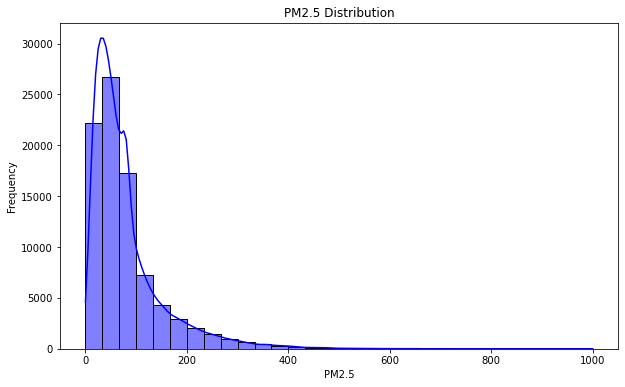

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(station_merged_df['PM2.5'], bins=30, kde=True, color='blue')
plt.title('PM2.5 Distribution')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.show()


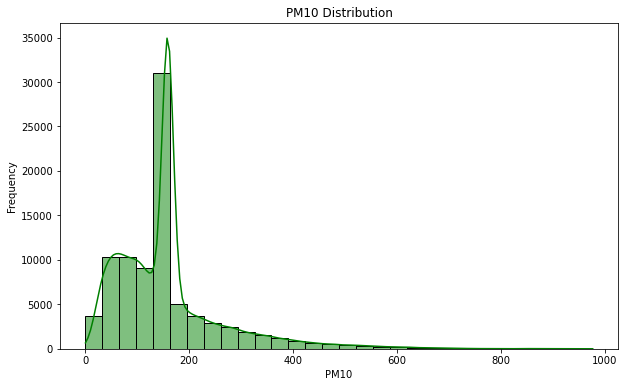

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(station_merged_df['PM10'], bins=30, kde=True, color='green')
plt.title('PM10 Distribution')
plt.xlabel('PM10')
plt.ylabel('Frequency')
plt.show()

In [ ]:
station_merged_df[[i for i in station_merged_data.columns if i not in ["AQI_Bucket","AQI", "year", "month", "day"]]].hist(bins=30, figsize=(20, 12), color="green", legend=True)
plt.show()

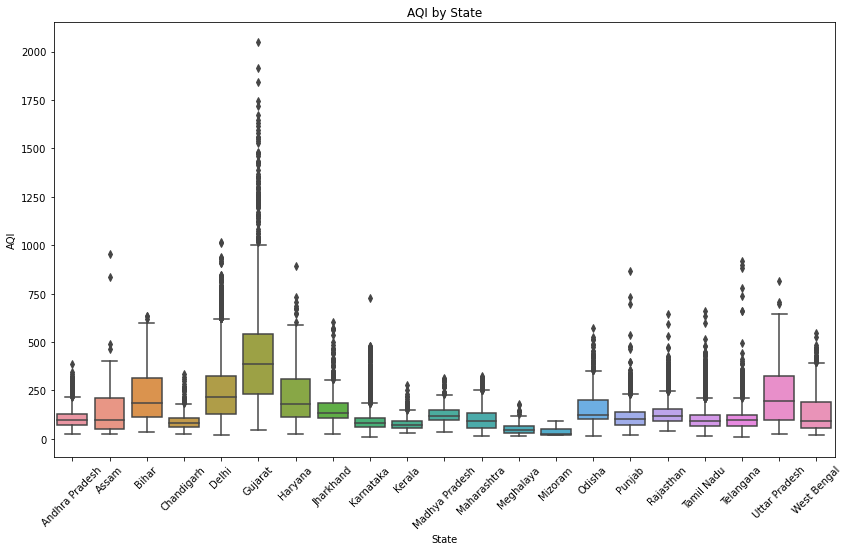

In [28]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='State', y='AQI', data=station_merged_df)
plt.title('AQI by State')
plt.xlabel('State')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.show()

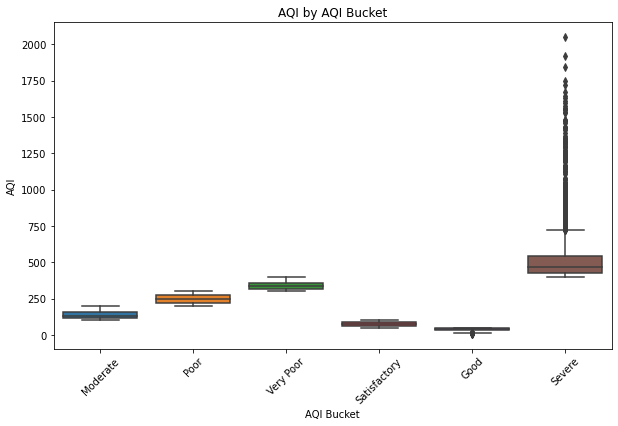

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='AQI_Bucket', y='AQI', data=station_merged_df)
plt.title('AQI by AQI Bucket')
plt.xlabel('AQI Bucket')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.show()

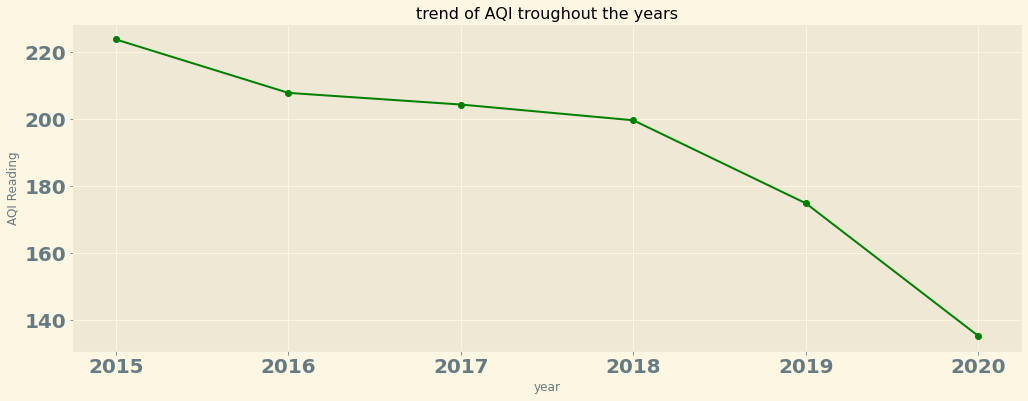

In [31]:
# -------------------------------------------------------------------------------------------------------------------
# 1. trend of aqi throughout the years 

plt.figure(figsize=(17,6))
yearly_grouped = station_merged_df.groupby("year")["AQI"].mean().plot(kind="line",c="green", marker="o",title="trend of AQI troughout the years", ylabel="AQI Reading")


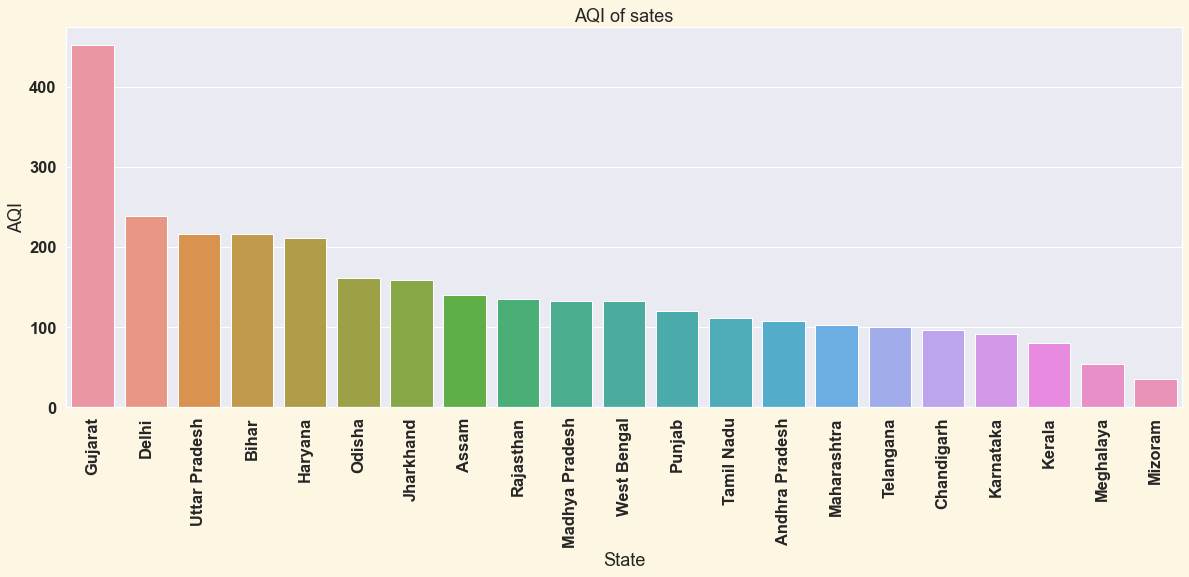

In [32]:
# -------------------------------------------------------------------------------------------------------------------
# 2. aqi trend of states in india

states_group = pd.DataFrame(station_merged_df.groupby("State")["AQI"].mean()).reset_index()
states_group = states_group.sort_values(by="AQI", ascending=False)
plt.figure(figsize=(20,7))
sns.set(font_scale=1.5)
sns.barplot(x='State', y='AQI', data=states_group).set(title ='AQI of sates')
plt.xticks(rotation=90)
plt.show()

In [33]:
def state_Aqi_from_2015_to_2020(required_state, year_or_month): 

    if year_or_month == 0: # yearly aqi report

        required_state_mask = station_merged_df["State"] == required_state # 3
        required_state_df = station_merged_df[required_state_mask] # 3
        years_group = pd.DataFrame(required_state_df.groupby("year")["AQI"].mean()).reset_index() # 4
        mpl.style.use("Solarize_Light2")  # 5
        plt.figure(figsize=(20,5)) # 5
        sns.set(font_scale=2) # 5
        sns.barplot(x="year", y="AQI", data=years_group).set(title=f"yearly AQI of {required_state}", xlabel="", ylabel="AQI") # 5

    elif year_or_month == 1: # monthly aqi report

        required_state_mask = station_merged_df["State"] == required_state # 3
        required_state_df = station_merged_df[required_state_mask] # 3
        months_group = pd.DataFrame(required_state_df.groupby("month")["AQI"].mean()).reset_index() # 4
        mpl.style.use("Solarize_Light2") # 5
        plt.figure(figsize=(20,5)) # 5
        plt.xticks(rotation=45)
        plt.plot(["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEPT", "OCT","NOV", "DEC"], months_group["AQI"], marker="o", c="purple") # 5
        plt.title(f"aqi trend of {required_state} months from 2016-2020")
        plt.ylabel("AQI")

In [34]:
state_list = station_merged_df.State.unique()
print("The number of states avaible are: ", len(state_list))
print(state_list)

The number of states avaible are:  21
['Andhra Pradesh' 'Assam' 'Bihar' 'Chandigarh' 'Delhi' 'Gujarat' 'Haryana'
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra'
 'Meghalaya' 'Mizoram' 'Odisha' 'Punjab' 'Rajasthan' 'Tamil Nadu'
 'Telangana' 'Uttar Pradesh' 'West Bengal']


Enter the state name correctly: Andhra Pradesh
Enter 0/1: 1


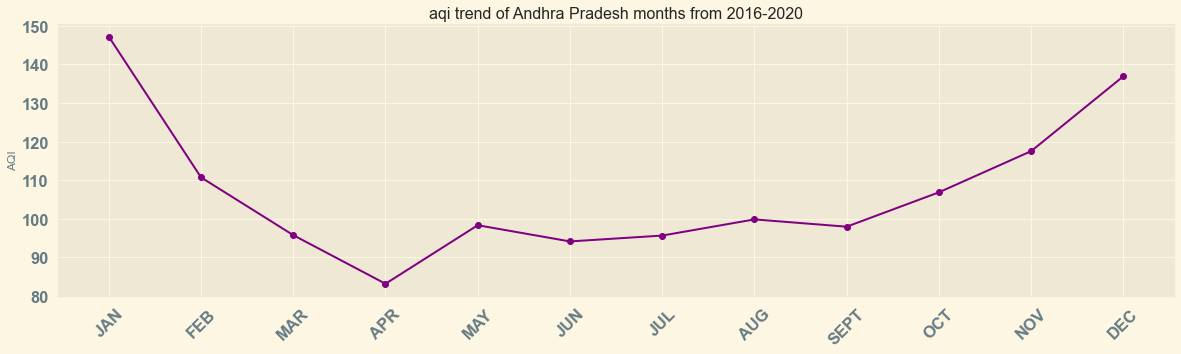

In [35]:
required_state = input("Enter the state name correctly: ")
year_or_month = int(input("Enter 0/1: ")) # 0 for yeqrly report 1 for monthly
state_Aqi_from_2015_to_2020(required_state, year_or_month)

<AxesSubplot:>

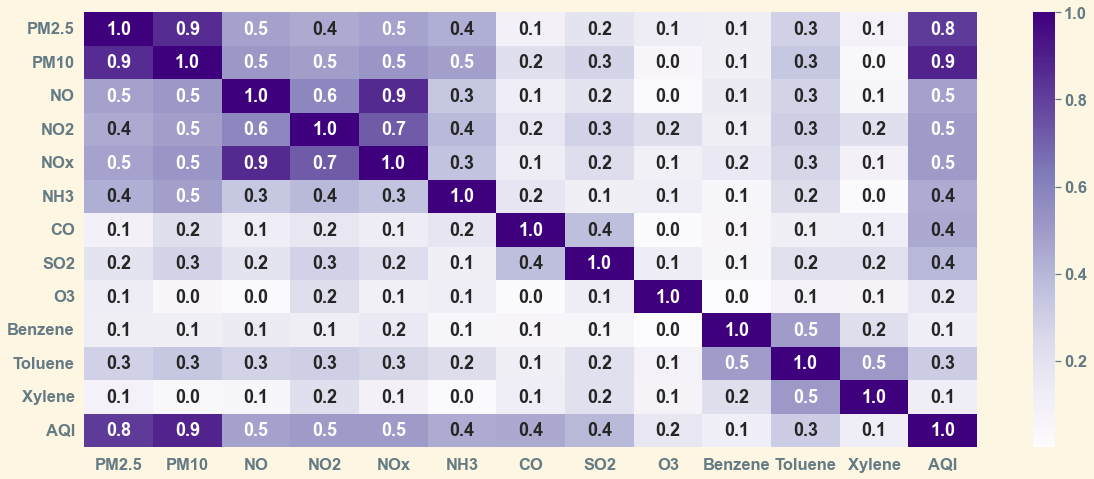

In [36]:
correlation_table = station_day_df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(correlation_table, annot=True, fmt=".1f" , cmap="Purples")

In [47]:
# -------------------------------------------------------------------------------------------------------------------
# 7. yearly/monthly state_toxic_gas_from_2015_2020 india function

def state_toxic_gas_from_2015_2020(state_city, required_state, year_or_month): # 1
    if year_or_month == 0: # 2

        required_state_mask = station_merged_df[state_city] == required_state # 3 
        required_state_df = station_merged_df[required_state_mask] # 3 
        required_state_df = required_state_df[['PM2.5', 'PM10','NO2','AQI','year']] # 3

        year_group = required_state_df.groupby("year") # 4
        years = list(str(year) for year in year_group.groups.keys()) # 4
        state_PM10 = required_state_df.groupby("year")['PM10'].mean() # 4
        state_PM25 = required_state_df.groupby("year")['PM2.5'].mean() # 4
        state_NO2 = required_state_df.groupby("year")['NO2'].mean() # 4

          
        plt.figure(figsize=(20,7)) # 5 

        pm10_ticks = range(1, len(years)+1) # 5 
        pm25_ticks = [x+0.2 for x in pm10_ticks] # 5 
        NO2_ticks = [x-0.2 for x in pm10_ticks] # 5 

        plt.bar(pm10_ticks, state_PM10, width=0.2, label="PM10") # 5 
        plt.bar(pm25_ticks,state_PM25, width=0.2, label="PM2.5") # 5 
        plt.bar(NO2_ticks,state_NO2, width=0.2, label="NO2") # 5 

        plt.title(f'Pollution levels in {required_state}') # 5 
        plt.ylabel('Pollutant levels (in thier respective units)', fontsize=20) # 5 
        plt.xticks(pm10_ticks, years) # 5 
        plt.legend() # 5 
        plt.show() # 5 

    elif year_or_month == 1: # 2
        
        required_state_mask = station_merged_df[state_city] == required_state # 3 
        required_state_df = station_merged_df[required_state_mask] # 3 
        required_state_df = required_state_df[['PM2.5', 'PM10','NO2','AQI','month']] # 3

        state_PM10 = list(required_state_df.groupby("month")['PM10'].mean()) # 4
        state_PM25 = list(required_state_df.groupby("month")['PM2.5'].mean()) # 4
        state_NO2 = list(required_state_df.groupby("month")['NO2'].mean()) # 4

        plt.figure(figsize=(20,7)) # 5 

        pm10_ticks = range(1, len(state_PM10)+ 1) # 5 
        pm25_ticks = [x+0.2 for x in pm10_ticks] # 5 
        NO2_ticks = [x-0.2 for x in pm10_ticks] # 5 

        plt.bar(pm10_ticks, state_PM10, width=0.2, label="PM10") # 5 
        plt.bar(pm25_ticks,state_PM25, width=0.2, label="PM2.5") # 5 
        plt.bar(NO2_ticks,state_NO2, width=0.2, label="NO2") # 5 
        plt.title(f'Pollution levels in {required_state}') # 5 
        plt.ylabel('Pollutant levels (in thier respective units)', fontsize=20) # 5 

        if len(pm10_ticks) == 12:
            plt.xticks(pm10_ticks, ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEPT", "OCT", "NOV", "DEC"]) # 5 
        elif len(pm10_ticks) != 12:
            plt.xticks(pm10_ticks, ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "SEPT", "OCT", "NOV", "DEC"])
            
        plt.legend() # 5 
        plt.show() # 5


In [48]:
state_list = station_merged_df.State.unique()
print("The number of states avaible are: ", len(state_list))
print(state_list)

The number of states avaible are:  21
['Andhra Pradesh' 'Assam' 'Bihar' 'Chandigarh' 'Delhi' 'Gujarat' 'Haryana'
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra'
 'Meghalaya' 'Mizoram' 'Odisha' 'Punjab' 'Rajasthan' 'Tamil Nadu'
 'Telangana' 'Uttar Pradesh' 'West Bengal']


In [49]:
city_list = station_merged_df.City.unique()
print("The number of cities avaible are: ", len(city_list))
print(city_list)

The number of cities avaible are:  26
['Amaravati' 'Visakhapatnam' 'Guwahati' 'Patna' 'Chandigarh' 'Delhi'
 'Ahmedabad' 'Gurugram' 'Jorapokhar' 'Bengaluru' 'Ernakulam' 'Kochi'
 'Thiruvananthapuram' 'Bhopal' 'Mumbai' 'Shillong' 'Aizawl' 'Brajrajnagar'
 'Talcher' 'Amritsar' 'Jaipur' 'Chennai' 'Coimbatore' 'Hyderabad'
 'Lucknow' 'Kolkata']


Enter State or CityCity
Enter correct state/ city name: Chennai
Enter 0/1: 0


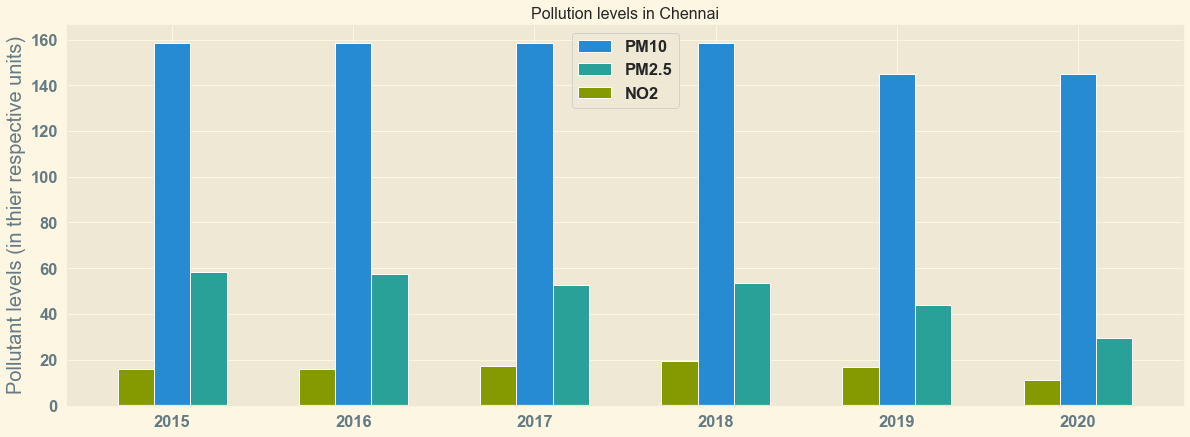

In [51]:
state_city= input("Enter State or City")
required_state = input("Enter correct state/ city name: ")
year_or_month = int(input("Enter 0/1: "))
state_toxic_gas_from_2015_2020(state_city,required_state, year_or_month)

In [ ]:
station_merged_df

In [56]:
station_merged_data = station_merged_df.drop(columns=["StationId", "City", "State", "year", "month", "day"])
station_merged_data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
1,81.40,124.50,1.440000,20.500000,12.080000,10.720000,0.12,15.24,127.09,0.20,6.50,0.060000,184.0,Moderate
2,78.32,129.06,1.260000,26.000000,14.850000,10.280000,0.14,26.96,117.44,0.22,7.95,0.080000,197.0,Moderate
3,88.76,135.32,6.600000,30.850000,21.770000,12.910000,0.11,33.59,111.81,0.29,7.63,0.120000,198.0,Moderate
4,64.18,104.09,2.560000,28.070000,17.010000,11.420000,0.09,19.00,138.18,0.17,5.02,0.070000,188.0,Moderate
5,72.47,114.84,5.230000,23.200000,16.590000,12.250000,0.16,10.55,109.74,0.21,4.71,0.080000,173.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108030,8.65,16.46,23.244401,35.118825,43.246664,28.654163,0.69,4.36,30.59,1.32,7.26,2.770696,50.0,Good
108031,11.80,18.47,23.244401,35.118825,43.246664,28.654163,0.68,3.49,38.95,1.42,7.92,2.770696,65.0,Satisfactory
108032,18.60,32.26,13.650000,200.870000,214.200000,11.400000,0.78,5.12,38.17,3.52,8.64,2.770696,63.0,Satisfactory
108033,16.07,39.30,7.560000,29.130000,36.690000,29.260000,0.69,5.88,29.64,1.86,8.40,2.770696,57.0,Satisfactory


In [57]:
station_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87025 entries, 1 to 108034
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       87025 non-null  float64
 1   PM10        87025 non-null  float64
 2   NO          87025 non-null  float64
 3   NO2         87025 non-null  float64
 4   NOx         87025 non-null  float64
 5   NH3         87025 non-null  float64
 6   CO          87025 non-null  float64
 7   SO2         87025 non-null  float64
 8   O3          87025 non-null  float64
 9   Benzene     87025 non-null  float64
 10  Toluene     87025 non-null  float64
 11  Xylene      87025 non-null  float64
 12  AQI         87025 non-null  float64
 13  AQI_Bucket  87025 non-null  object 
dtypes: float64(13), object(1)
memory usage: 12.0+ MB


In [58]:
station_merged_data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000,87025.000000
mean,80.387649,158.557614,23.244401,35.118825,43.246664,28.654163,1.615741,12.212651,38.320547,3.566688,16.557039,2.770696,179.749290
std,74.423783,105.210343,34.222470,28.762116,44.189047,19.467973,4.183293,11.762390,37.327266,10.105827,25.333435,3.260980,131.324339
min,0.040000,0.030000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,32.960000,89.370000,4.920000,15.390000,16.160000,18.000000,0.610000,5.530000,20.420000,0.480000,2.300000,2.770696,86.000000
50%,58.530000,158.557614,10.620000,27.790000,30.040000,28.654163,0.980000,10.190000,34.220000,2.530000,16.190000,2.770696,132.000000
75%,97.330000,167.020000,24.180000,46.290000,50.470000,29.740000,1.560000,13.960000,44.660000,3.566688,16.557039,2.770696,254.000000
max,1000.000000,976.770000,437.850000,448.050000,434.900000,365.680000,175.810000,186.080000,963.000000,455.030000,454.850000,170.370000,2049.000000


In [59]:
station_merged_data = station_merged_data.drop(columns="AQI_Bucket")
target_y = station_merged_data["AQI"]
features_x = pd.DataFrame(station_merged_data.drop(columns="AQI"))

target_y

1         184.0
2         197.0
3         198.0
4         188.0
5         173.0
          ...  
108030     50.0
108031     65.0
108032     63.0
108033     57.0
108034     59.0
Name: AQI, Length: 87025, dtype: float64

In [60]:
features_x

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
1,81.40,124.50,1.440000,20.500000,12.080000,10.720000,0.12,15.24,127.09,0.20,6.50,0.060000
2,78.32,129.06,1.260000,26.000000,14.850000,10.280000,0.14,26.96,117.44,0.22,7.95,0.080000
3,88.76,135.32,6.600000,30.850000,21.770000,12.910000,0.11,33.59,111.81,0.29,7.63,0.120000
4,64.18,104.09,2.560000,28.070000,17.010000,11.420000,0.09,19.00,138.18,0.17,5.02,0.070000
5,72.47,114.84,5.230000,23.200000,16.590000,12.250000,0.16,10.55,109.74,0.21,4.71,0.080000
...,...,...,...,...,...,...,...,...,...,...,...,...
108030,8.65,16.46,23.244401,35.118825,43.246664,28.654163,0.69,4.36,30.59,1.32,7.26,2.770696
108031,11.80,18.47,23.244401,35.118825,43.246664,28.654163,0.68,3.49,38.95,1.42,7.92,2.770696
108032,18.60,32.26,13.650000,200.870000,214.200000,11.400000,0.78,5.12,38.17,3.52,8.64,2.770696
108033,16.07,39.30,7.560000,29.130000,36.690000,29.260000,0.69,5.88,29.64,1.86,8.40,2.770696


In [61]:
scaler = StandardScaler()

features_x = pd.DataFrame(scaler.fit_transform(features_x),columns=features_x.columns)
features_x.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
count,8.702500e+04,8.702500e+04,8.702500e+04,8.702500e+04,8.702500e+04,8.702500e+04,8.702500e+04,8.702500e+04,8.702500e+04,8.702500e+04,8.702500e+04,8.702500e+04
mean,-2.712218e-14,-2.515562e-14,-4.829482e-15,3.212199e-15,-1.523856e-14,5.706201e-14,-3.734447e-15,-3.120164e-15,1.620048e-14,5.855547e-15,1.858968e-14,7.994276e-15
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-1.079603e+00,-1.506777e+00,-6.786341e-01,-1.220669e+00,-9.786795e-01,-1.471356e+00,-3.862388e-01,-1.037436e+00,-1.026348e+00,-3.529358e-01,-6.535685e-01,-8.496563e-01
25%,-6.372684e-01,-6.576161e-01,-5.354525e-01,-6.859349e-01,-6.129759e-01,-5.472693e-01,-2.404198e-01,-5.681405e-01,-4.795596e-01,-3.054382e-01,-5.627788e-01,3.298270e-09
50%,-2.936934e-01,3.199693e-09,-3.688943e-01,-2.548097e-01,-2.988691e-01,1.443698e-08,-1.519722e-01,-1.719602e-01,-1.098546e-01,-1.025838e-01,-1.448841e-02,3.298270e-09
75%,2.276483e-01,8.043349e-02,2.733890e-02,3.884012e-01,1.634653e-01,5.577589e-02,-1.332468e-02,1.485547e-01,1.698354e-01,2.017614e-08,-2.567778e-09,3.298270e-09
max,1.235650e+01,7.776964e+00,1.211508e+01,1.435686e+01,8.863182e+00,1.731191e+01,4.164070e+01,1.478172e+01,2.477237e+01,4.467382e+01,1.730107e+01,5.139568e+01


In [62]:
pt = PowerTransformer() # by default the mehtod is yeo transform
features_x_transformed = pt.fit_transform(features_x)
features_x_transformed = pd.DataFrame(features_x_transformed, columns=features_x.columns)
features_x = features_x_transformed

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(features_x, target_y, random_state=0)

print(f"training data --> X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"testing data --> X_test: {X_test.shape}, Y_test: {Y_test.shape}")

training data --> X_train: (65268, 12), Y_train: (65268,)
testing data --> X_test: (21757, 12), Y_test: (21757,)


In [98]:
mlr_model = LinearRegression().fit(X_train, Y_train)
xgb_model = XGBRegressor().fit(X_train, Y_train)
svr_model = SVR(kernel="rbf").fit(X_train, Y_train)

KeyboardInterrupt: 

In [ ]:
mea_scores = []
cross_val_scores = []
training_scores = [mlr_model.score(X_train, Y_train), xgb_model.score(X_train, Y_train)]
#training_scores = [mlr_model.score(X_train, Y_train), xgb_model.score(X_train, Y_train), svr_model.score(X_train, Y_train)]

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Assuming you have defined mlr_model, xgb_model, mlr_model_prediction, xgb_model_prediction, Y_test, features_x, target_y appropriately

mlr_model_prediction = mlr_model.predict(X_test)
xgb_model_prediction = xgb_model.predict(X_test)

testing_scores = [metrics.r2_score(mlr_model_prediction, Y_test), metrics.r2_score(xgb_model_prediction, Y_test)]
mea_scores = [metrics.mean_absolute_error(mlr_model_prediction, Y_test), metrics.mean_absolute_error(xgb_model_prediction, Y_test)]
cross_val_scores_list = [cross_val_score(mlr_model, features_x, target_y, cv=3).mean(), cross_val_score(xgb_model, features_x, target_y, cv=3).mean()]

print(training_scores)
print(testing_scores)
print(mea_scores)
print(cross_val_scores_list)

model_names = ["mlr_model", "xgb_model", ]
final_scores_df = pd.DataFrame({
    "model_names": model_names,
    "training_scores": training_scores,
    "testing_scores": testing_scores,
    "mea_scores" : mea_scores,
    "cross_val_scores": cross_val_scores_list
}).round(2)

final_scores_df = final_scores_df.sort_values(by="cross_val_scores")

print(final_scores_df)


In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(20, 8))

ax1.plot(model_names,final_scores_df["training_scores"],color="orange", marker="o")
ax1.set_title("training_scores")

ax2.plot(model_names,final_scores_df["testing_scores"],color="green", marker="o")
ax2.set_title("testing_scores")

ax3.plot(model_names,final_scores_df["mea_scores"],color="Blue", marker="o")
ax3.set_title("mea_scores")

ax4.plot(model_names,final_scores_df["cross_val_scores"],color="purple", marker="o")
ax4.set_title("cross_val_scores")

plt.show()

In [94]:
xgb_model_mse = metrics.mean_squared_error(xgb_model_prediction, Y_test)
xgb_model_mea = metrics.mean_absolute_error(xgb_model_prediction, Y_test)
xgb_model_rmse = math.sqrt(xgb_model_mse)

print("The mean absolute error of the model is : ",xgb_model_mea.round(2))
print("The mean squared error of the model is : ",xgb_model_mse.round(2))
print("The mean root mean squared error of the model is : ",xgb_model_rmse)

The mean absolute error of the model is :  21.3
The mean squared error of the model is :  1397.95
The mean root mean squared error of the model is :  37.3891089570577


In [96]:
Y = station_merged_data["AQI"]
X = station_merged_data.drop(columns=["AQI"])

# these are spllited versions of nomral data which is not scaled not yeo transformed

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

normal_xgb_model = XGBRegressor().fit(X_train, Y_train)
normal_xgb_model_prediction = normal_xgb_model.predict(X_test)

print(" --- stats of normal_xgb_model --- ")
print("Training score: ", normal_xgb_model.score(X_train, Y_train).round(2))
print("Testing score: ", metrics.r2_score(normal_xgb_model_prediction, Y_test).round(2))
print("mean absolute error: ", metrics.mean_absolute_error(normal_xgb_model_prediction, Y_test).round(2))
print("mean sqared error: ", metrics.mean_squared_error(normal_xgb_model_prediction, Y_test).round(2))
print("root mean sqared error: ", math.sqrt(metrics.mean_squared_error(normal_xgb_model_prediction, Y_test)))

 --- stats of normal_xgb_model --- 
Training score:  0.95
Testing score:  0.91
mean absolute error:  21.3
mean sqared error:  1397.95
root mean sqared error:  37.3891089570577


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X = station_merged_data.drop(columns=["AQI"])
y = station_merged_data['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)


In [110]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_regressor.predict(X_test)


In [111]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
training_score = rf_regressor.score(X_train, y_train)
print("Training R-squared:", training_score)
# Make predictions on the testing set
y_pred = rf_regressor.predict(X_test)
# Testing score
testing_score = rf_regressor.score(X_test, y_test)
print("Testing R-squared:", testing_score)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Training R-squared: 0.9861618943630924
Testing R-squared: 0.923683483501988
Mean Squared Error: 1287.9395518598226
Mean Absolute Error: 20.696727756890688
R-squared: 0.923683483501988


In [ ]:
''''from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import math

# Assuming you have defined X, y appropriately

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Train the SVR model
svr_model = SVR().fit(X_train, Y_train)
svr_model_prediction = svr_model.predict(X_test)

print(" --- stats of SVR model --- ")
print("Training score:", svr_model.score(X_train, Y_train).round(2))
print("Testing score:", metrics.r2_score(svr_model_prediction, Y_test).round(2))
print("Mean absolute error:", metrics.mean_absolute_error(svr_model_prediction, Y_test).round(2))
print("Mean squared error:", metrics.mean_squared_error(svr_model_prediction, Y_test).round(2))
print("Root mean squared error:", math.sqrt(metrics.mean_squared_error(svr_model_prediction, Y_test)).round(2))'''


In [112]:
new_data = pd.DataFrame({
    'PM2.5': [30, 35, 78.32,150],  # Example PM2.5 values
    'PM10': [40, 45, 129.06,140],  # Example PM10 values
    'NO': [10, 12, 1.26,15],  # Example NO values
    'NO2': [15, 18, 26.00,45],  # Example NO2 values
    'NOx': [20, 22, 14.85,50],  # Example NOx values
    'NH3': [5, 6, 10.28,20],  # Example NH3 values
    'CO': [2.5, 2.8, 0.14,8.7],  # Example CO values
    'SO2': [8, 9, 26.96,30],  # Example SO2 values
    'O3': [35, 40, 117.44,137],  # Example O3 values
    'Benzene': [1, 1.2, 0.22,5],  # Example Benzene values
    'Toluene': [1.5, 1.8, 7.95,9],# Example Toluene values
    'Xylene':[0.06,0.12, 0.08,0.98] #Example Xylene Values
})
print("Sample New Data:")
print(new_data)

Sample New Data:
    PM2.5    PM10     NO   NO2    NOx    NH3    CO    SO2      O3  Benzene  \
0   30.00   40.00  10.00  15.0  20.00   5.00  2.50   8.00   35.00     1.00   
1   35.00   45.00  12.00  18.0  22.00   6.00  2.80   9.00   40.00     1.20   
2   78.32  129.06   1.26  26.0  14.85  10.28  0.14  26.96  117.44     0.22   
3  150.00  140.00  15.00  45.0  50.00  20.00  8.70  30.00  137.00     5.00   

   Toluene  Xylene  
0     1.50    0.06  
1     1.80    0.12  
2     7.95    0.08  
3     9.00    0.98  


In [113]:
predictions = rf_regressor.predict(new_data)

# Print predictions
print("Predicted AQI values:")
print(predictions)

Predicted AQI values:
[110.13 122.4  200.28 318.13]
